In [1]:
#Trying to implemenet a basic version of segmentation and denoising over here

So over here basic pipeline we have is
1. Load the pictures from the desired dataset two diff photos 

2. One if we're starting with psnr we basically need to load the photo into with image_true and image_test(the noised image) (If i have photos how do we decide which is which can prolly reverse and see)
* Basically need to plot a graph of psnr vs noise when we're increasing the amount of noise percentage wise in the pixels 

3. If we're doing SSIM we'll compare two photos in the following order as Bhavesh had requested and deal with them accordingly 
* Dog and cat
* Cat and cat (diff breed)
* Dog and Dog (diff breed)
*Dog and Dog (same breed but diff angle/lighting)
* Cat and Cat (same breed but diff angle/lighting)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float, io
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.transform import resize
from skimage.filters import gaussian
import matplotlib.pyplot as plt
import torch
from torch import nn
from tqdm import tqdm
import math


In [3]:
# Path to the text file containing the image file names
text_file_path = "/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/annotations/annotations/list.txt"

# Initialize empty sets to store unique cat and dog file names
unique_cats = set()
unique_dogs = set()

# Read the text file line by line
with open(text_file_path, "r") as file:
    for line in file:
        # Split the line by spaces
        parts = line.split()
        if len(parts) > 0:
            # Extract the image file name (assuming it's the first part)
            filename = parts[0]
            # Remove any numbering before the first underscore
            name_without_numbering = filename.split("_", 1)[0]
            # Check if the filename starts with a capital letter (cat) or a lowercase letter (dog)
            if name_without_numbering[0].isupper():
                unique_cats.add(name_without_numbering)
            else:
                unique_dogs.add(name_without_numbering)

# Convert the sets to lists and print the unique cat and dog file names
unique_cats_list = list(unique_cats)
unique_dogs_list = list(unique_dogs)

print("Unique cat names list:")
print(unique_cats_list)

print("\nUnique dog names list:")
print(unique_dogs_list)


Unique cat names list:
['Bengal', 'Bombay', 'Egyptian', 'Persian', 'Russian', 'British', 'Siamese', 'Birman', 'Ragdoll', 'Maine', 'Sphynx', 'Abyssinian']

Unique dog names list:
['wheaten', 'staffordshire', 'chihuahua', 'great', 'scottish', 'keeshond', 'leonberger', 'saint', 'pomeranian', 'yorkshire', 'pug', '#BREED', 'english', 'havanese', '#images', 'samoyed', 'boxer', 'newfoundland', 'miniature', '#ID:', '#All', 'shiba', 'beagle', 'basset', '#Image', 'american', 'german', '#SPECIES:', 'japanese']


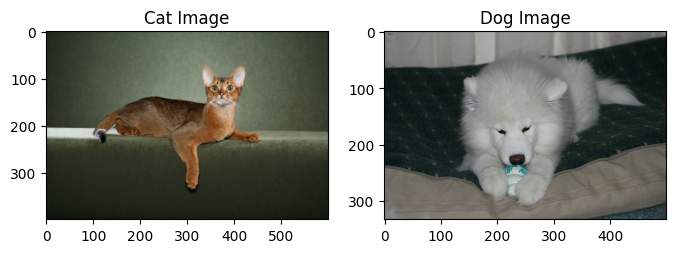

In [4]:
import matplotlib.pyplot as plt
from skimage import img_as_float 

cat_pic_1 = img_as_float(io.imread('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/Abyssinian_1.jpg'))
dog_pic_1 = img_as_float(io.imread('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/samoyed_1.jpg'))
cat_pic_1_same = img_as_float(io.imread('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/Abyssinian_2.jpg'))
dog_pic_1_same = img_as_float(io.imread('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/samoyed_2.jpg'))
cat_pic_2 = img_as_float(io.imread('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/Persian_1.jpg'))
dog_pic_2 = img_as_float(io.imread('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/pug_1.jpg'))



black_pic = img_as_float(io.imread('/kaggle/input/imp-ref-photos/black_pic.png'))
white_pic = img_as_float(io.imread('/kaggle/input/imp-ref-photos/white_pic.jpeg'))
same_dog_a = img_as_float(io.imread('/kaggle/input/imp-ref-photos/same_dog_a.png'))
same_dog_b = img_as_float(io.imread('/kaggle/input/imp-ref-photos/same_dog_b.png'))
same_dog_c = img_as_float(io.imread('/kaggle/input/imp-ref-photos/same_dog_c.png'))
same_dog_d = img_as_float(io.imread('/kaggle/input/imp-ref-photos/same_dog_d.png'))



# Display the images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cat_pic_1)
plt.title('Cat Image')

plt.subplot(1, 2, 2)
plt.imshow(dog_pic_1)
plt.title('Dog Image')

plt.show()





SSIM_cat_dog: 0.17417516296821284
SSIM_cat_black: 0.06489796302211508
SSIM_cat_white: 0.26641334712022835
SSIM_cat_same: 0.24930483920201468
SSIM_cat_diff: 0.15981570429680175
SSIM_dog_same: 0.09423014962165162
SSIM_dog_diff: 0.043295286190984716


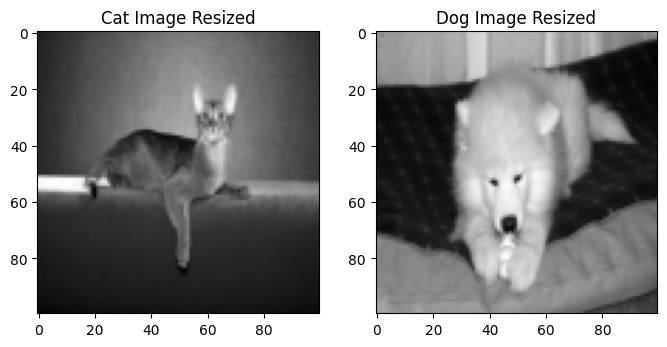

In [5]:


# Function to resize and convert an image to grayscale
def preprocess_image(image, target_shape):
    gray_image = rgb2gray(image)
    resized_image = resize(gray_image, target_shape, anti_aliasing=True)
    return resized_image

# Function to compare two images using SSIM
def compare_images(image1, image2, target_shape):
    image1_preprocessed = preprocess_image(image1, target_shape)
    image2_preprocessed = preprocess_image(image2, target_shape)
    ssim_value = ssim(image1_preprocessed, image2_preprocessed, data_range=image1_preprocessed.max() - image1_preprocessed.min())
    return ssim_value

# Sample usage
if __name__ == "__main__":
    # Load your images here (for example, using plt.imread)
    cat_pic_1 = cat_pic_1
    dog_pic_1 = dog_pic_1

    target_shape = (100, 100)
    ssim_value = compare_images(cat_pic_1, dog_pic_1, target_shape)
    ssim_value2 = compare_images(cat_pic_1,black_pic, target_shape)
    ssim_value3 = compare_images(cat_pic_1,white_pic,target_shape)
    ssim_value4 = compare_images(cat_pic_1,cat_pic_1_same,target_shape)
    ssim_value5 = compare_images(cat_pic_1,cat_pic_2,target_shape)
    ssim_value6 = compare_images(dog_pic_1,dog_pic_1_same,target_shape)
    ssim_value7 = compare_images(dog_pic_1,dog_pic_2,target_shape)
    
    
    
    ssim
    print("SSIM_cat_dog:", ssim_value)
    print("SSIM_cat_black:", ssim_value2)
    print("SSIM_cat_white:", ssim_value3)
    print("SSIM_cat_same:", ssim_value4)
    print("SSIM_cat_diff:", ssim_value5)
    print("SSIM_dog_same:", ssim_value6)
    print("SSIM_dog_diff:", ssim_value7)


    


    # Display the images
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(preprocess_image(cat_pic_1, target_shape), cmap='gray')
    plt.title('Cat Image Resized')
    plt.subplot(1, 2, 2)
    plt.imshow(preprocess_image(dog_pic_1, target_shape), cmap='gray')
    plt.title('Dog Image Resized')
    plt.show()



PSNR experiments start here 


In [6]:


# Function to add Gaussian noise to an image
def add_gaussian_noise(image, noise_level):
    mean = 0
    var = noise_level
    sigma = var ** 0.5
    noisy_image = image + np.random.normal(mean, sigma, image.shape)
    return np.clip(noisy_image, 0, 1)

# Function to denoise an image using a Gaussian filter
def denoise_gaussian(image, sigma=1):
    return gaussian(image, sigma=sigma)

# Function to process the image and generate PSNR results and plot
def process_image(input_image):
    # Preprocess the image
    target_shape = (100, 100)
    input_image_gray = rgb2gray(input_image)
    input_image_resized = resize(input_image_gray, target_shape, anti_aliasing=True)

    # Noise levels and results storage
    noise_levels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    psnr_results = []
    for i in range (10):
        psnr_row_results = []

        # Add noise, denoise, and calculate metrics
        for noise_level in noise_levels:
            noisy_image = add_gaussian_noise(input_image_resized, noise_level)
            denoised_image = denoise_gaussian(noisy_image, sigma=1)
            psnr_value = psnr(input_image_resized, denoised_image)
            psnr_row_results.append(psnr_value)
        psnr_results.append(psnr_row_results)

    # Convert noise levels to percentages for plotting
    noise_percentages = [str(int(level * 100)) + '%' for level in noise_levels]

    # Plotting PSNR values against noise levels
    plt.figure(figsize=(10, 5))
    
    for row_results in psnr_results:
        plt.plot(noise_percentages, row_results, marker='o', linestyle='--',color = 'lightgray',alpha=0.3)
        
    avg_psnr = np.mean(psnr_results, axis=0)
    plt.plot(noise_percentages, avg_psnr, marker='o',linestyle='--',color='black', label='Average PSNR')
        
        
    plt.title('PSNR values at Different Noise Levels')
    plt.xlabel('Noise Level')
    plt.ylabel('PSNR Value')
    plt.grid(True)
    plt.show()

    return psnr_results

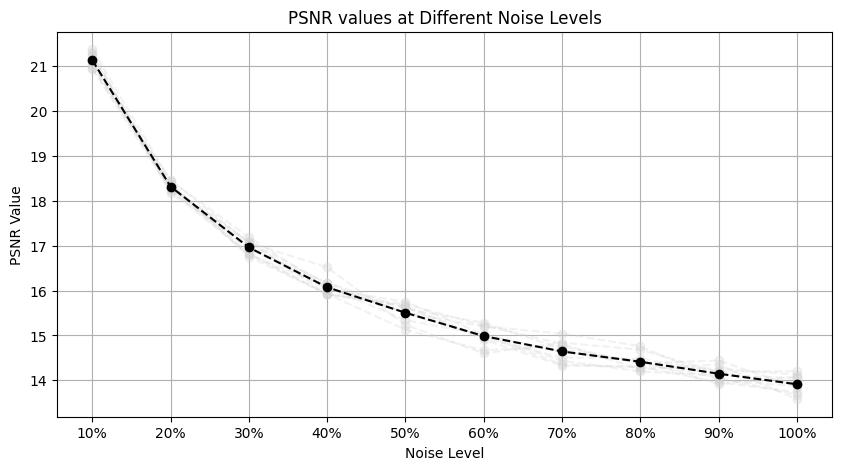

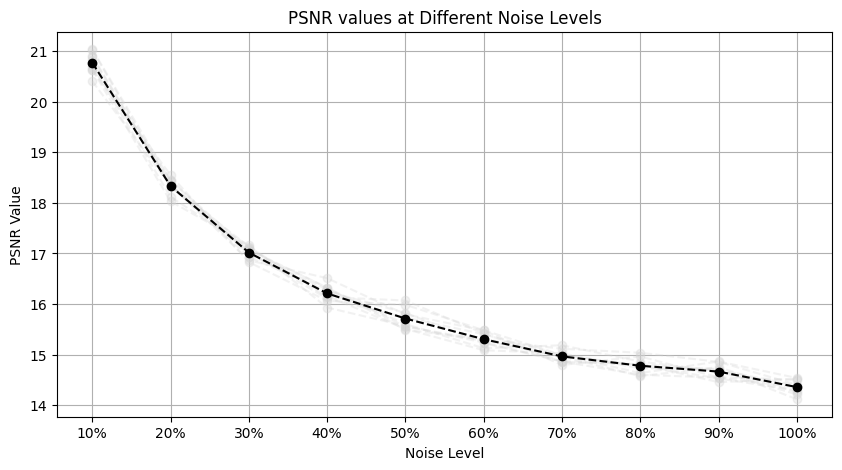

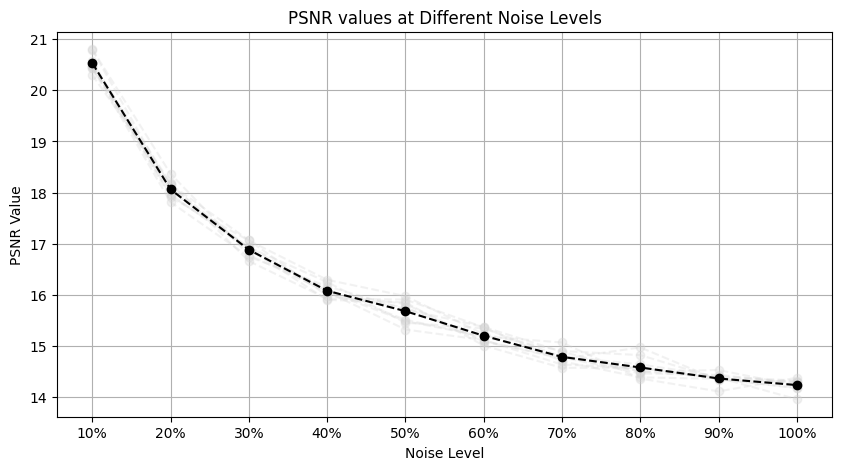

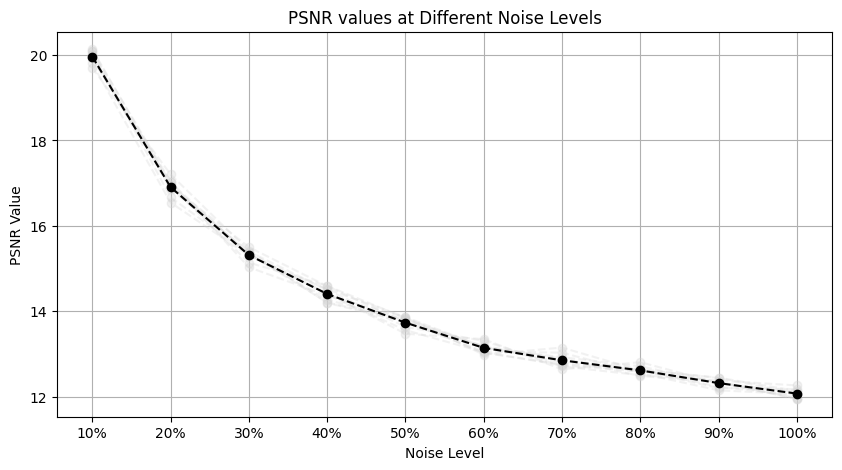

In [7]:


# Process the images and get PSNR results
cat_psnr_results = process_image(cat_pic_1)
dog_psnr_results = process_image(dog_pic_1)
dog_same_psnr_results= process_image(dog_pic_1_same)
cat_same_psnr_results= process_image(cat_pic_1_same)



# 3) **Cell Image testing starts here**

Shape of clean_test_images: (5200, 256, 256)


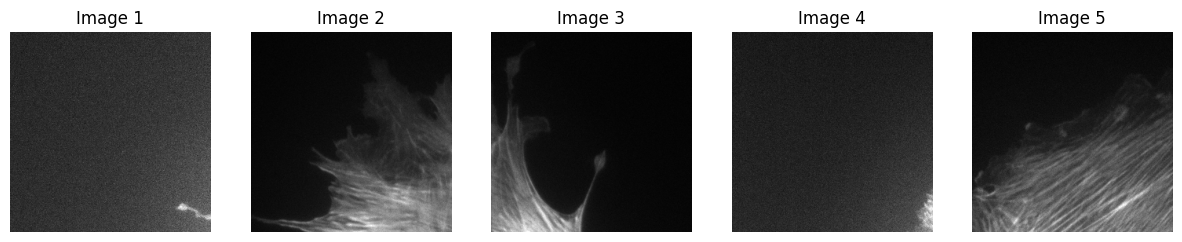

In [8]:

# Load the clean test images
clean_test_images = np.load('/kaggle/input/denoising-data/clean_test.npy')

print("Shape of clean_test_images:", clean_test_images.shape)


# Visualize the first few images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(clean_test_images[i], cmap='gray')
    ax.set_title(f"Image {i+1}")
    ax.axis('off')
plt.show()

Shape of clean_train_images: (41520, 256, 256)


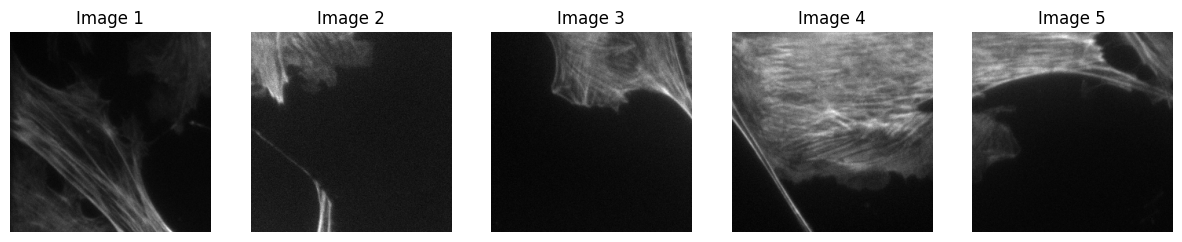

In [9]:
clean_train_images = np.load('/kaggle/input/denoising-data/clean_train.npy')

print("Shape of clean_train_images:", clean_train_images.shape)


# Visualize the first few images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(clean_train_images[i], cmap='gray')
    ax.set_title(f"Image {i+1}")
    ax.axis('off')
plt.show()

Shape of noise_train_images: (41520, 256, 256)


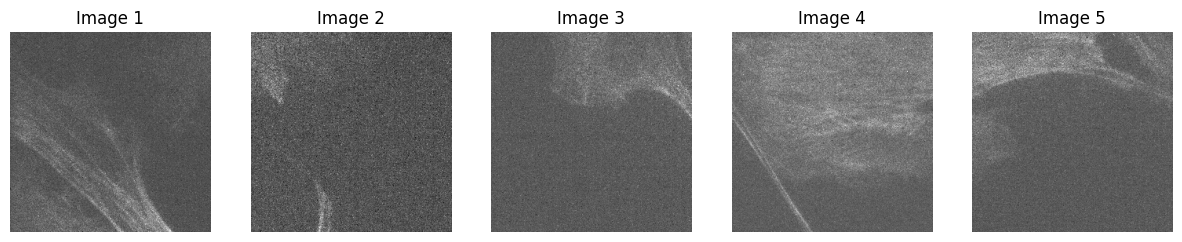

In [10]:
noise_train_images = np.load('/kaggle/input/denoising-data/noise_train.npy')

print("Shape of noise_train_images:", noise_train_images.shape)


# Visualize the first few images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(noise_train_images[i], cmap='gray')
    ax.set_title(f"Image {i+1}")
    ax.axis('off')
plt.show()

Shape of noise_test_images: (41520, 256, 256)


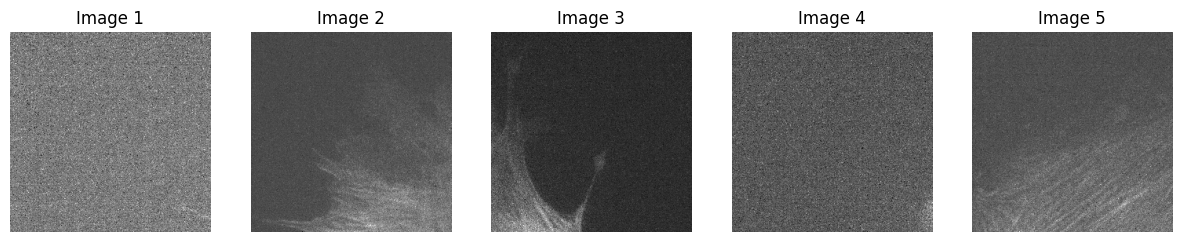

In [11]:
noise_test_images = np.load('/kaggle/input/denoising-data/noise_test.npy')


print("Shape of noise_test_images:", noise_train_images.shape)


# Visualize the first few images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(noise_test_images[i], cmap='gray')
    ax.set_title(f"Image {i+1}")
    ax.axis('off')
plt.show()

In [12]:
noisy_image = noise_train_images[0]
clean_image = clean_train_images[0]

def compare_images(image1, image2, target_shape):
    image1_resized = resize(image1, target_shape, anti_aliasing=True)
    image2_resized = resize(image2, target_shape, anti_aliasing=True)
    ssim_value = ssim(image1_resized, image2_resized, data_range=image2_resized.max() - image2_resized.min())
    return ssim_value


target_shape = (256, 256)  # Assuming your images are 256x256 pixels
ssim_value = compare_images(noisy_image, clean_image, target_shape)
print("SSIM between the first noisy and clean image:", ssim_value)

SSIM between the first noisy and clean image: 0.49163567194733687


In [13]:
noisy_test_image = noise_test_images[0]
clean_test_image = clean_test_images[0]

def compare_images(image1, image2, target_shape):
    image1_resized = resize(image1, target_shape, anti_aliasing=True)
    image2_resized = resize(image2, target_shape, anti_aliasing=True)
    ssim_value = ssim(image1_resized, image2_resized, data_range=image2_resized.max() - image2_resized.min())
    return ssim_value


target_shape = (256, 256)  # Assuming your images are 256x256 pixels
ssim_value = compare_images(noisy_test_image, clean_test_image, target_shape)
print("SSIM between the first noisy and clean image:", ssim_value)



SSIM between the first noisy and clean image: 0.4396179090453914


In [14]:


def calculate_psnr(image1, image2):
    return psnr(image1, image2)

psnr_value = calculate_psnr(noisy_test_image, clean_test_image)
print(f"PSNR: {psnr_value}")


PSNR: 63.87954900769469


In [15]:
psnr_train = [calculate_psnr(clean, noise) for clean, noise in zip(clean_train_images, noise_train_images)]
psnr_test = [calculate_psnr(clean, noise) for clean, noise in zip(clean_test_images, noise_test_images)]



In [16]:
mean_psnr_train = np.mean(psnr_train)
variance_psnr_train = np.var(psnr_train)
std_psrn_train = np.std(psnr_train)

mean_psnr_test = np.mean(psnr_test)
variance_psnr_test = np.var(psnr_test)
std_psrn_test = np.std(psnr_test)



In [17]:
print(f"Train PSNR - Mean: {mean_psnr_train}, Variance: {variance_psnr_train}, ")
print(f"Test PSNR - Mean: {mean_psnr_test}, Variance: {variance_psnr_test}")


Train PSNR - Mean: 54.59104488374475, Variance: 266.9385962004368, 
Test PSNR - Mean: 55.608489459657484, Variance: 255.5910941200347


#  4) Running sample inferences on the given pre trained model 


In [2]:
#importing the data 
noise_test_images = np.load('/kaggle/input/denoising-data/noise_test.npy')
noise_train_images = np.load('/kaggle/input/denoising-data/noise_train.npy')
# Convert to PyTorch tensors
noise_train_tensor = torch.from_numpy(noise_train_images.astype(np.float32))
noise_test_tensor = torch.from_numpy(noise_test_images.astype(np.float32))

In [3]:
print(noise_train_images.shape)

(41520, 256, 256)


In [9]:
class RatUNet(nn.Module):
    def __init__(self, block, num_features=64):
        super(RatUNet, self).__init__()
        self.inplanes = num_features
        
        self.conv = nn.Conv2d(1, num_features, kernel_size=3, stride=1, padding=1, bias=True)

        self.layer1 = self._make_layer(block, 64, 128, 3, stride=2)
        self.layer2 = self._make_layer(block, 128, 256, 3, stride=2)

        self.deconv1 = nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, output_padding=1, bias=False)
        self.layer3 = self._make_layer(block, 256, 512, 4, stride=2)
        self.deconv2 = nn.ConvTranspose2d(512, 128, kernel_size=3, stride=2, padding=1, output_padding=1, bias=False)
        self.deconv3 = nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1, bias=False)

        self.layer4 = self._make_layer(block, 256, 256, 3)
        self.layer5 = self._make_layer(block, 128, 128, 3)
        self.layer6 = self._make_layer(block, 128, 128, 2)
        self.conv2 = nn.Sequential(nn.Conv2d(192, 128, kernel_size=3, stride=1, padding=1, bias=True),
                                   nn.PReLU(),
                                   nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1, bias=True),
                                   nn.PReLU(),
                                   nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1, bias=True),
                                   nn.PReLU(),
                                   nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1, groups=128, bias=True),
                                   nn.Conv2d(128, 128, kernel_size=1, stride=1, padding=0, bias=True),
                                   nn.ReLU(inplace=True),
                                   )
        self.ca = SequentialPolarizedSelfAttention(128)
        self.lastconv = nn.Conv2d(128, 1, kernel_size=3, stride=1, padding=1, bias=True)
        
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0.0, math.sqrt(1.0 / n))
                m.bias.data.zero_()

    def _make_layer(self, block, inplanes, planes, blocks, stride=1):
        layers = []
        downsample = None
        self.inplanes = inplanes
        if stride != 1:
            downsample = nn.Sequential(
                    nn.Conv2d(self.inplanes, planes, kernel_size=1, stride=1, bias=True),
                    nn.AvgPool2d(kernel_size=2, stride=stride),
            )
#        if  stride == 1 and self.inplanes == 2*planes:
#            downsample = nn.Sequential(
#                nn.Conv2d(self.inplanes, planes, kernel_size=1, stride=1, bias=True),
#                #nn.BatchNorm2d(planes)
#            )
        
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)
    
    def forward(self, x):
        
        res = self.conv(x)

        res2 = self.layer1(res)
        res3 = self.layer2(res2)        
        out = self.layer3(res3)
        
        out = self.deconv1(out)               
        out = self.layer4(out)
        out = torch.cat((out, res3), dim=1) 

        out = self.deconv2(out)        
        out = self.layer5(out)
        out = torch.cat((out, res2), dim=1)
        
        out = self.deconv3(out)        
        out = self.layer6(out)
        out = torch.cat((out, res), dim=1)
        
        out = self.conv2(out)
        out = self.ca(out)
        out = self.lastconv(out)
        
        return x - out

class BasicBlock(nn.Module):
    expansion=1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=3, stride = stride, padding=1, bias=True)
        #self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.PReLU()#.LeakyReLU(0.2, inplace=True)# nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride = 1, padding=1, bias=True)
        #self.conv3 = nn.Conv2d(planes, planes, kernel_size=1, stride = 1, padding=0, bias=True)

        self.downsample = downsample
        #self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        #out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)        
        
        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual      
        out = self.relu(out)

        return out

class ChannelAttention(nn.Module):
    def __init__(self, in_planes, ratio=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
           
        self.fc = nn.Sequential(nn.Conv2d(in_planes, in_planes // 16, 1, bias=True),
                               nn.ReLU(),
                               nn.Conv2d(in_planes // 16, in_planes, 1, bias=True))
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out)

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()

        self.conv1 = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=True)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x = torch.cat([avg_out, max_out], dim=1)
        x = self.conv1(x)
        return self.sigmoid(x)
    
class SequentialPolarizedSelfAttention(nn.Module):

    def __init__(self, channel=512):
        super().__init__()
        self.ch_wv=nn.Conv2d(channel,channel//2,kernel_size=(1,1))
        self.ch_wq=nn.Conv2d(channel,1,kernel_size=(1,1))
        self.softmax_channel=nn.Softmax(1)
        self.softmax_spatial=nn.Softmax(-1)
        self.ch_wz=nn.Conv2d(channel//2,channel,kernel_size=(1,1))
        self.ln=nn.LayerNorm(channel)
        self.sigmoid=nn.Sigmoid()
        self.sp_wv=nn.Conv2d(channel,channel//2,kernel_size=(1,1))
        self.sp_wq=nn.Conv2d(channel,channel//2,kernel_size=(1,1))
        self.agp=nn.AdaptiveAvgPool2d((1,1))

    def forward(self, x):
        b, c, h, w = x.size()

        #Channel-only Self-Attention
        channel_wv=self.ch_wv(x) #bs,c//2,h,w
        channel_wq=self.ch_wq(x) #bs,1,h,w
        channel_wv=channel_wv.reshape(b,c//2,-1) #bs,c//2,h*w
        channel_wq=channel_wq.reshape(b,-1,1) #bs,h*w,1
        channel_wq=self.softmax_channel(channel_wq)
        channel_wz=torch.matmul(channel_wv,channel_wq).unsqueeze(-1) #bs,c//2,1,1
        channel_weight=self.sigmoid(self.ch_wz(channel_wz).reshape(b,c,1).permute(0,2,1)).permute(0,2,1).reshape(b,c,1,1) #bs,c,1,1self.ln(
        channel_out=channel_weight*x

        #Spatial-only Self-Attention
        spatial_wv=self.sp_wv(channel_out) #bs,c//2,h,w
        spatial_wq=self.sp_wq(channel_out) #bs,c//2,h,w
        spatial_wq=self.agp(spatial_wq) #bs,c//2,1,1
        spatial_wv=spatial_wv.reshape(b,c//2,-1) #bs,c//2,h*w
        spatial_wq=spatial_wq.permute(0,2,3,1).reshape(b,1,c//2) #bs,1,c//2
        spatial_wq=self.softmax_spatial(spatial_wq)
        spatial_wz=torch.matmul(spatial_wq,spatial_wv) #bs,1,h*w
        spatial_weight=self.sigmoid(spatial_wz.reshape(b,1,h,w)) #bs,1,h,w
        spatial_out=spatial_weight*channel_out
        return spatial_out

In [10]:
# Assuming that the complete model might have been saved and not just the state dict
model = torch.load('/kaggle/input/model_epoch_100.pth/pytorch/version1/1/model_epoch_100.pth', map_location='cuda')
model.eval()

# No need to use load_state_dict if the entire model was saved


# Move model to the same device as the data
if torch.cuda.is_available():
    model.cuda()


AttributeError: Can't get attribute 'RatUNet' on <module '__main__'>

Over here we are defining the model for which we have the stored weights 

In [6]:
# Load model
model = torch.load('/kaggle/input/model_epoch_100.pth/pytorch/version1/1/model_epoch_100.pth', map_location=torch.device('cuda'))

# If model is wrapped in DataParallel and causing issues, try accessing the underlying model directly
if isinstance(model, torch.nn.DataParallel):
    model = model.module

model.to('cuda')  # Ensure model is on GPU
model.eval()  # Set the model to inference mode


RatUNet(
  (conv): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (relu): PReLU(num_parameters=1)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (downsample): Sequential(
        (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
        (1): AvgPool2d(kernel_size=2, stride=2, padding=0)
      )
    )
    (1): BasicBlock(
      (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu): PReLU(num_parameters=1)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (2): BasicBlock(
      (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu): PReLU(num_parameters=1)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
  )
  (layer2): Sequential(
    (0): 

NameError: name 'model' is not defined

In [11]:

def process_in_batches(model, data_tensor, batch_size=32):
    model.eval()  # Ensure the model is in evaluation mode
    denoised_images = []
    num_batches = int(np.ceil(data_tensor.size(0) / batch_size))
    print(f"Processing {num_batches} batches...")

    with torch.no_grad():  # Disables gradient calculation
        for i in tqdm(range(num_batches), desc="Denoising"):
            batch_start = i * batch_size
            batch_end = min((i + 1) * batch_size, data_tensor.size(0))
            batch = data_tensor[batch_start:batch_end].to('cuda', non_blocking=True)  # Move batch to GPU
            print(f"Batch {i+1}: Device - {batch.device}, Size - {batch.size()}")
            denoised_batch = model(batch)
            denoised_images.append(denoised_batch.detach().cpu().numpy())  # Move results back to CPU
            torch.cuda.empty_cache()  # Clear unused memory after processing each batch

    return np.concatenate(denoised_images, axis=0

In [ ]:
# Process the training data
denoised_train_images = process_in_batches(model, noise_train_tensor, batch_size=64)

# Optionally, process the test data similarly
denoised_test_images = process_in_batches(model, noise_test_tensor, batch_size=64)


Processing 649 batches...


Denoising:   0%|          | 0/649 [00:00<?, ?it/s]

Batch 1: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   0%|          | 1/649 [00:02<27:52,  2.58s/it]

Batch 2: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   0%|          | 2/649 [00:04<24:37,  2.28s/it]

Batch 3: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   0%|          | 3/649 [00:06<23:22,  2.17s/it]

Batch 4: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   1%|          | 4/649 [00:08<23:06,  2.15s/it]

Batch 5: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   1%|          | 5/649 [00:10<22:34,  2.10s/it]

Batch 6: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   1%|          | 6/649 [00:12<22:18,  2.08s/it]

Batch 7: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   1%|          | 7/649 [00:14<22:05,  2.06s/it]

Batch 8: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   1%|          | 8/649 [00:16<21:58,  2.06s/it]

Batch 9: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   1%|▏         | 9/649 [00:19<22:05,  2.07s/it]

Batch 10: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   2%|▏         | 10/649 [00:21<21:59,  2.06s/it]

Batch 11: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   2%|▏         | 11/649 [00:23<22:05,  2.08s/it]

Batch 12: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   2%|▏         | 12/649 [00:25<21:58,  2.07s/it]

Batch 13: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   2%|▏         | 13/649 [00:27<22:00,  2.08s/it]

Batch 14: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   2%|▏         | 14/649 [00:29<22:03,  2.08s/it]

Batch 15: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   2%|▏         | 15/649 [00:31<22:04,  2.09s/it]

Batch 16: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   2%|▏         | 16/649 [00:33<22:06,  2.10s/it]

Batch 17: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   3%|▎         | 17/649 [00:35<22:06,  2.10s/it]

Batch 18: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   3%|▎         | 18/649 [00:37<22:08,  2.11s/it]

Batch 19: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   3%|▎         | 19/649 [00:40<22:13,  2.12s/it]

Batch 20: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   3%|▎         | 20/649 [00:42<22:10,  2.11s/it]

Batch 21: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   3%|▎         | 21/649 [00:44<22:11,  2.12s/it]

Batch 22: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   3%|▎         | 22/649 [00:46<22:10,  2.12s/it]

Batch 23: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   4%|▎         | 23/649 [00:48<22:09,  2.12s/it]

Batch 24: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   4%|▎         | 24/649 [00:50<22:06,  2.12s/it]

Batch 25: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   4%|▍         | 25/649 [00:52<22:02,  2.12s/it]

Batch 26: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   4%|▍         | 26/649 [00:54<22:03,  2.12s/it]

Batch 27: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   4%|▍         | 27/649 [00:57<22:23,  2.16s/it]

Batch 28: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   4%|▍         | 28/649 [00:59<22:21,  2.16s/it]

Batch 29: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   4%|▍         | 29/649 [01:01<22:20,  2.16s/it]

Batch 30: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   5%|▍         | 30/649 [01:03<22:11,  2.15s/it]

Batch 31: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   5%|▍         | 31/649 [01:05<22:02,  2.14s/it]

Batch 32: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   5%|▍         | 32/649 [01:07<22:00,  2.14s/it]

Batch 33: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   5%|▌         | 33/649 [01:10<22:04,  2.15s/it]

Batch 34: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   5%|▌         | 34/649 [01:12<22:00,  2.15s/it]

Batch 35: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   5%|▌         | 35/649 [01:14<21:58,  2.15s/it]

Batch 36: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   6%|▌         | 36/649 [01:16<22:10,  2.17s/it]

Batch 37: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   6%|▌         | 37/649 [01:18<22:14,  2.18s/it]

Batch 38: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   6%|▌         | 38/649 [01:20<22:17,  2.19s/it]

Batch 39: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   6%|▌         | 39/649 [01:23<22:23,  2.20s/it]

Batch 40: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   6%|▌         | 40/649 [01:25<22:27,  2.21s/it]

Batch 41: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   6%|▋         | 41/649 [01:27<22:27,  2.22s/it]

Batch 42: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   6%|▋         | 42/649 [01:29<22:35,  2.23s/it]

Batch 43: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   7%|▋         | 43/649 [01:32<22:37,  2.24s/it]

Batch 44: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   7%|▋         | 44/649 [01:34<22:25,  2.22s/it]

Batch 45: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   7%|▋         | 45/649 [01:36<22:28,  2.23s/it]

Batch 46: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   7%|▋         | 46/649 [01:38<22:26,  2.23s/it]

Batch 47: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   7%|▋         | 47/649 [01:41<22:32,  2.25s/it]

Batch 48: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   7%|▋         | 48/649 [01:43<22:34,  2.25s/it]

Batch 49: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   8%|▊         | 49/649 [01:45<22:28,  2.25s/it]

Batch 50: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   8%|▊         | 50/649 [01:47<22:18,  2.23s/it]

Batch 51: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   8%|▊         | 51/649 [01:50<22:18,  2.24s/it]

Batch 52: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   8%|▊         | 52/649 [01:52<22:08,  2.22s/it]

Batch 53: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   8%|▊         | 53/649 [01:54<22:06,  2.23s/it]

Batch 54: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   8%|▊         | 54/649 [01:56<22:04,  2.23s/it]

Batch 55: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   8%|▊         | 55/649 [01:58<22:01,  2.22s/it]

Batch 56: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   9%|▊         | 56/649 [02:01<21:47,  2.21s/it]

Batch 57: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   9%|▉         | 57/649 [02:03<21:52,  2.22s/it]

Batch 58: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   9%|▉         | 58/649 [02:05<21:35,  2.19s/it]

Batch 59: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   9%|▉         | 59/649 [02:07<21:32,  2.19s/it]

Batch 60: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   9%|▉         | 60/649 [02:09<21:34,  2.20s/it]

Batch 61: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   9%|▉         | 61/649 [02:12<21:27,  2.19s/it]

Batch 62: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  10%|▉         | 62/649 [02:14<21:21,  2.18s/it]

Batch 63: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  10%|▉         | 63/649 [02:16<21:23,  2.19s/it]

Batch 64: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  10%|▉         | 64/649 [02:18<21:25,  2.20s/it]

Batch 65: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  10%|█         | 65/649 [02:20<21:30,  2.21s/it]

Batch 66: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  10%|█         | 66/649 [02:23<21:25,  2.20s/it]

Batch 67: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  10%|█         | 67/649 [02:25<21:22,  2.20s/it]

Batch 68: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  10%|█         | 68/649 [02:27<21:24,  2.21s/it]

Batch 69: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  11%|█         | 69/649 [02:29<21:32,  2.23s/it]

Batch 70: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  11%|█         | 70/649 [02:32<21:35,  2.24s/it]

Batch 71: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  11%|█         | 71/649 [02:34<21:27,  2.23s/it]

Batch 72: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  11%|█         | 72/649 [02:36<21:23,  2.22s/it]

Batch 73: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  11%|█         | 73/649 [02:38<21:18,  2.22s/it]

Batch 74: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  11%|█▏        | 74/649 [02:40<21:15,  2.22s/it]

Batch 75: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  12%|█▏        | 75/649 [02:43<21:21,  2.23s/it]

Batch 76: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  12%|█▏        | 76/649 [02:45<21:19,  2.23s/it]

Batch 77: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  12%|█▏        | 77/649 [02:47<21:23,  2.24s/it]

Batch 78: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  12%|█▏        | 78/649 [02:49<21:11,  2.23s/it]

Batch 79: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  12%|█▏        | 79/649 [02:52<21:06,  2.22s/it]

Batch 80: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  12%|█▏        | 80/649 [02:54<21:02,  2.22s/it]

Batch 81: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  12%|█▏        | 81/649 [02:56<21:06,  2.23s/it]

Batch 82: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  13%|█▎        | 82/649 [02:58<21:05,  2.23s/it]

Batch 83: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  13%|█▎        | 83/649 [03:00<21:00,  2.23s/it]

Batch 84: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  13%|█▎        | 84/649 [03:03<20:55,  2.22s/it]

Batch 85: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  13%|█▎        | 85/649 [03:05<20:56,  2.23s/it]

Batch 86: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  13%|█▎        | 86/649 [03:07<20:57,  2.23s/it]

Batch 87: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  13%|█▎        | 87/649 [03:09<20:51,  2.23s/it]

Batch 88: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  14%|█▎        | 88/649 [03:12<20:51,  2.23s/it]

Batch 89: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  14%|█▎        | 89/649 [03:14<20:43,  2.22s/it]

Batch 90: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  14%|█▍        | 90/649 [03:16<20:47,  2.23s/it]

Batch 91: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  14%|█▍        | 91/649 [03:18<20:46,  2.23s/it]

Batch 92: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  14%|█▍        | 92/649 [03:21<20:43,  2.23s/it]

Batch 93: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  14%|█▍        | 93/649 [03:23<20:34,  2.22s/it]

Batch 94: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  14%|█▍        | 94/649 [03:25<20:35,  2.23s/it]

Batch 95: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  15%|█▍        | 95/649 [03:27<20:34,  2.23s/it]

Batch 96: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  15%|█▍        | 96/649 [03:29<20:31,  2.23s/it]

Batch 97: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  15%|█▍        | 97/649 [03:32<20:32,  2.23s/it]

Batch 98: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  15%|█▌        | 98/649 [03:34<20:29,  2.23s/it]

Batch 99: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  15%|█▌        | 99/649 [03:36<20:27,  2.23s/it]

Batch 100: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  15%|█▌        | 100/649 [03:38<20:23,  2.23s/it]

Batch 101: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  16%|█▌        | 101/649 [03:41<20:17,  2.22s/it]

Batch 102: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  16%|█▌        | 102/649 [03:43<20:04,  2.20s/it]

Batch 103: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  16%|█▌        | 103/649 [03:45<20:06,  2.21s/it]

Batch 104: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  16%|█▌        | 104/649 [03:47<19:49,  2.18s/it]

Batch 105: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  16%|█▌        | 105/649 [03:49<19:53,  2.19s/it]

Batch 106: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  16%|█▋        | 106/649 [03:51<19:46,  2.18s/it]

Batch 107: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  16%|█▋        | 107/649 [03:54<19:50,  2.20s/it]

Batch 108: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  17%|█▋        | 108/649 [03:56<19:54,  2.21s/it]

Batch 109: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  17%|█▋        | 109/649 [03:58<19:55,  2.21s/it]

Batch 110: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  17%|█▋        | 110/649 [04:00<19:42,  2.19s/it]

Batch 111: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  17%|█▋        | 111/649 [04:02<19:36,  2.19s/it]

Batch 112: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  17%|█▋        | 112/649 [04:05<19:41,  2.20s/it]

Batch 113: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  17%|█▋        | 113/649 [04:07<19:43,  2.21s/it]

Batch 114: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  18%|█▊        | 114/649 [04:09<19:44,  2.21s/it]

Batch 115: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  18%|█▊        | 115/649 [04:11<19:45,  2.22s/it]

Batch 116: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  18%|█▊        | 116/649 [04:14<19:42,  2.22s/it]

Batch 117: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  18%|█▊        | 117/649 [04:16<19:42,  2.22s/it]

Batch 118: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  18%|█▊        | 118/649 [04:18<19:44,  2.23s/it]

Batch 119: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  18%|█▊        | 119/649 [04:20<19:35,  2.22s/it]

Batch 120: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  18%|█▊        | 120/649 [04:22<19:24,  2.20s/it]

Batch 121: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  19%|█▊        | 121/649 [04:25<19:19,  2.20s/it]

Batch 122: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  19%|█▉        | 122/649 [04:27<19:23,  2.21s/it]

Batch 123: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  19%|█▉        | 123/649 [04:29<19:24,  2.21s/it]

Batch 124: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  19%|█▉        | 124/649 [04:31<19:23,  2.22s/it]

Batch 125: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  19%|█▉        | 125/649 [04:33<19:16,  2.21s/it]

Batch 126: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  19%|█▉        | 126/649 [04:36<19:18,  2.22s/it]

Batch 127: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  20%|█▉        | 127/649 [04:38<19:19,  2.22s/it]

Batch 128: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  20%|█▉        | 128/649 [04:40<19:17,  2.22s/it]

Batch 129: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  20%|█▉        | 129/649 [04:42<19:13,  2.22s/it]

Batch 130: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  20%|██        | 130/649 [04:45<19:15,  2.23s/it]

Batch 131: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  20%|██        | 131/649 [04:47<19:13,  2.23s/it]

Batch 132: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  20%|██        | 132/649 [04:49<19:10,  2.23s/it]

Batch 133: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  20%|██        | 133/649 [04:51<19:02,  2.21s/it]

Batch 134: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  21%|██        | 134/649 [04:53<18:52,  2.20s/it]

Batch 135: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  21%|██        | 135/649 [04:56<19:00,  2.22s/it]

Batch 136: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  21%|██        | 136/649 [04:58<19:02,  2.23s/it]

Batch 137: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  21%|██        | 137/649 [05:00<19:06,  2.24s/it]

Batch 138: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  21%|██▏       | 138/649 [05:02<19:04,  2.24s/it]

Batch 139: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  21%|██▏       | 139/649 [05:05<19:04,  2.24s/it]

Batch 140: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  22%|██▏       | 140/649 [05:07<18:58,  2.24s/it]

Batch 141: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  22%|██▏       | 141/649 [05:09<18:49,  2.22s/it]

Batch 142: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  22%|██▏       | 142/649 [05:11<18:50,  2.23s/it]

Batch 143: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  22%|██▏       | 143/649 [05:14<18:46,  2.23s/it]

Batch 144: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  22%|██▏       | 144/649 [05:16<18:48,  2.23s/it]

Batch 145: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  22%|██▏       | 145/649 [05:18<18:46,  2.24s/it]

Batch 146: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  22%|██▏       | 146/649 [05:20<18:43,  2.23s/it]

Batch 147: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  23%|██▎       | 147/649 [05:23<18:38,  2.23s/it]

Batch 148: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  23%|██▎       | 148/649 [05:25<18:35,  2.23s/it]

Batch 149: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  23%|██▎       | 149/649 [05:27<18:27,  2.21s/it]

Batch 150: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  23%|██▎       | 150/649 [05:29<18:30,  2.22s/it]

Batch 151: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  23%|██▎       | 151/649 [05:31<18:31,  2.23s/it]

Batch 152: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  23%|██▎       | 152/649 [05:34<18:29,  2.23s/it]

Batch 153: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  24%|██▎       | 153/649 [05:36<18:18,  2.22s/it]

Batch 154: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  24%|██▎       | 154/649 [05:38<18:23,  2.23s/it]

Batch 155: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  24%|██▍       | 155/649 [05:40<18:22,  2.23s/it]

Batch 156: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  24%|██▍       | 156/649 [05:43<18:19,  2.23s/it]

Batch 157: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  24%|██▍       | 157/649 [05:45<18:06,  2.21s/it]

Batch 158: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  24%|██▍       | 158/649 [05:47<18:07,  2.22s/it]

Batch 159: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  24%|██▍       | 159/649 [05:49<17:55,  2.19s/it]

Batch 160: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  25%|██▍       | 160/649 [05:51<17:58,  2.20s/it]

Batch 161: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  25%|██▍       | 161/649 [05:53<17:53,  2.20s/it]

Batch 162: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  25%|██▍       | 162/649 [05:56<17:53,  2.20s/it]

Batch 163: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  25%|██▌       | 163/649 [05:58<17:49,  2.20s/it]

Batch 164: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  25%|██▌       | 164/649 [06:00<17:56,  2.22s/it]

Batch 165: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  25%|██▌       | 165/649 [06:02<17:57,  2.23s/it]

Batch 166: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  26%|██▌       | 166/649 [06:05<17:56,  2.23s/it]

Batch 167: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  26%|██▌       | 167/649 [06:07<17:53,  2.23s/it]

Batch 168: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  26%|██▌       | 168/649 [06:09<17:54,  2.23s/it]

Batch 169: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  26%|██▌       | 169/649 [06:11<17:49,  2.23s/it]

Batch 170: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  26%|██▌       | 170/649 [06:14<17:51,  2.24s/it]

Batch 171: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  26%|██▋       | 171/649 [06:16<17:50,  2.24s/it]

Batch 172: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  27%|██▋       | 172/649 [06:18<17:43,  2.23s/it]

Batch 173: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  27%|██▋       | 173/649 [06:20<17:33,  2.21s/it]

Batch 174: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  27%|██▋       | 174/649 [06:22<17:34,  2.22s/it]

Batch 175: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  27%|██▋       | 175/649 [06:25<17:28,  2.21s/it]

Batch 176: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  27%|██▋       | 176/649 [06:27<17:30,  2.22s/it]

Batch 177: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  27%|██▋       | 177/649 [06:29<17:30,  2.23s/it]

Batch 178: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  27%|██▋       | 178/649 [06:31<17:27,  2.22s/it]

Batch 179: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  28%|██▊       | 179/649 [06:33<17:13,  2.20s/it]

Batch 180: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  28%|██▊       | 180/649 [06:36<17:14,  2.21s/it]

Batch 181: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  28%|██▊       | 181/649 [06:38<17:10,  2.20s/it]

Batch 182: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  28%|██▊       | 182/649 [06:40<17:11,  2.21s/it]

Batch 183: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  28%|██▊       | 183/649 [06:42<17:08,  2.21s/it]

Batch 184: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  28%|██▊       | 184/649 [06:45<17:09,  2.21s/it]

Batch 185: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  29%|██▊       | 185/649 [06:47<17:02,  2.20s/it]

Batch 186: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  29%|██▊       | 186/649 [06:49<17:07,  2.22s/it]

Batch 187: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  29%|██▉       | 187/649 [06:51<16:59,  2.21s/it]

Batch 188: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  29%|██▉       | 188/649 [06:53<16:48,  2.19s/it]

Batch 189: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  29%|██▉       | 189/649 [06:56<16:52,  2.20s/it]

Batch 190: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  29%|██▉       | 190/649 [06:58<16:50,  2.20s/it]

Batch 191: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  29%|██▉       | 191/649 [07:00<16:46,  2.20s/it]

Batch 192: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  30%|██▉       | 192/649 [07:02<16:49,  2.21s/it]

Batch 193: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  30%|██▉       | 193/649 [07:04<16:47,  2.21s/it]

Batch 194: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  30%|██▉       | 194/649 [07:07<16:40,  2.20s/it]

Batch 195: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  30%|███       | 195/649 [07:09<16:42,  2.21s/it]

Batch 196: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  30%|███       | 196/649 [07:11<16:39,  2.21s/it]

Batch 197: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  30%|███       | 197/649 [07:13<16:28,  2.19s/it]

Batch 198: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  31%|███       | 198/649 [07:15<16:31,  2.20s/it]

Batch 199: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  31%|███       | 199/649 [07:18<16:29,  2.20s/it]

Batch 200: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  31%|███       | 200/649 [07:20<16:21,  2.18s/it]

Batch 201: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  31%|███       | 201/649 [07:22<16:22,  2.19s/it]

Batch 202: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  31%|███       | 202/649 [07:24<16:28,  2.21s/it]

Batch 203: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  31%|███▏      | 203/649 [07:26<16:18,  2.19s/it]

Batch 204: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  31%|███▏      | 204/649 [07:29<16:21,  2.21s/it]

Batch 205: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  32%|███▏      | 205/649 [07:31<16:22,  2.21s/it]

Batch 206: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  32%|███▏      | 206/649 [07:33<16:23,  2.22s/it]

Batch 207: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  32%|███▏      | 207/649 [07:35<16:14,  2.20s/it]

Batch 208: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  32%|███▏      | 208/649 [07:37<16:16,  2.22s/it]

Batch 209: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  32%|███▏      | 209/649 [07:40<16:17,  2.22s/it]

Batch 210: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  32%|███▏      | 210/649 [07:42<16:15,  2.22s/it]

Batch 211: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  33%|███▎      | 211/649 [07:44<16:14,  2.23s/it]

Batch 212: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  33%|███▎      | 212/649 [07:46<16:10,  2.22s/it]

Batch 213: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  33%|███▎      | 213/649 [07:49<16:11,  2.23s/it]

Batch 214: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  33%|███▎      | 214/649 [07:51<16:08,  2.23s/it]

Batch 215: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  33%|███▎      | 215/649 [07:53<16:05,  2.22s/it]

Batch 216: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  33%|███▎      | 216/649 [07:55<16:04,  2.23s/it]

Batch 217: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  33%|███▎      | 217/649 [07:57<15:59,  2.22s/it]

Batch 218: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  34%|███▎      | 218/649 [08:00<15:48,  2.20s/it]

Batch 219: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  34%|███▎      | 219/649 [08:02<15:49,  2.21s/it]

Batch 220: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  34%|███▍      | 220/649 [08:04<15:41,  2.20s/it]

Batch 221: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  34%|███▍      | 221/649 [08:06<15:37,  2.19s/it]

Batch 222: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  34%|███▍      | 222/649 [08:08<15:40,  2.20s/it]

Batch 223: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  34%|███▍      | 223/649 [08:11<15:38,  2.20s/it]

Batch 224: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  35%|███▍      | 224/649 [08:13<15:33,  2.20s/it]

Batch 225: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  35%|███▍      | 225/649 [08:15<15:32,  2.20s/it]

Batch 226: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  35%|███▍      | 226/649 [08:17<15:34,  2.21s/it]

Batch 227: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  35%|███▍      | 227/649 [08:19<15:34,  2.22s/it]

Batch 228: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  35%|███▌      | 228/649 [08:22<15:34,  2.22s/it]

Batch 229: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  35%|███▌      | 229/649 [08:24<15:33,  2.22s/it]

Batch 230: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  35%|███▌      | 230/649 [08:26<15:31,  2.22s/it]

Batch 231: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  36%|███▌      | 231/649 [08:28<15:32,  2.23s/it]

Batch 232: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  36%|███▌      | 232/649 [08:31<15:17,  2.20s/it]

Batch 233: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  36%|███▌      | 233/649 [08:33<15:20,  2.21s/it]

Batch 234: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  36%|███▌      | 234/649 [08:35<15:21,  2.22s/it]

Batch 235: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  36%|███▌      | 235/649 [08:37<15:17,  2.22s/it]

Batch 236: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  36%|███▋      | 236/649 [08:39<15:18,  2.22s/it]

Batch 237: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  37%|███▋      | 237/649 [08:42<15:16,  2.23s/it]

Batch 238: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  37%|███▋      | 238/649 [08:44<15:15,  2.23s/it]

Batch 239: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  37%|███▋      | 239/649 [08:46<15:12,  2.23s/it]

Batch 240: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  37%|███▋      | 240/649 [08:48<15:11,  2.23s/it]

Batch 241: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  37%|███▋      | 241/649 [08:51<15:09,  2.23s/it]

Batch 242: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  37%|███▋      | 242/649 [08:53<15:07,  2.23s/it]

Batch 243: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  37%|███▋      | 243/649 [08:55<15:05,  2.23s/it]

Batch 244: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  38%|███▊      | 244/649 [08:57<15:01,  2.23s/it]

Batch 245: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  38%|███▊      | 245/649 [09:00<15:00,  2.23s/it]

Batch 246: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  38%|███▊      | 246/649 [09:02<14:54,  2.22s/it]

Batch 247: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  38%|███▊      | 247/649 [09:04<14:51,  2.22s/it]

Batch 248: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  38%|███▊      | 248/649 [09:06<14:51,  2.22s/it]

Batch 249: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  38%|███▊      | 249/649 [09:08<14:49,  2.22s/it]

Batch 250: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  39%|███▊      | 250/649 [09:11<14:44,  2.22s/it]

Batch 251: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  39%|███▊      | 251/649 [09:13<14:39,  2.21s/it]

Batch 252: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  39%|███▉      | 252/649 [09:15<14:34,  2.20s/it]

Batch 253: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  39%|███▉      | 253/649 [09:17<14:34,  2.21s/it]

Batch 254: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  39%|███▉      | 254/649 [09:19<14:26,  2.19s/it]

Batch 255: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  39%|███▉      | 255/649 [09:22<14:25,  2.20s/it]

Batch 256: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  39%|███▉      | 256/649 [09:24<14:24,  2.20s/it]

Batch 257: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  40%|███▉      | 257/649 [09:26<14:26,  2.21s/it]

Batch 258: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  40%|███▉      | 258/649 [09:28<14:29,  2.22s/it]

Batch 259: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  40%|███▉      | 259/649 [09:30<14:27,  2.22s/it]

Batch 260: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  40%|████      | 260/649 [09:33<14:27,  2.23s/it]

Batch 261: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  40%|████      | 261/649 [09:35<14:27,  2.24s/it]

Batch 262: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  40%|████      | 262/649 [09:37<14:23,  2.23s/it]

Batch 263: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  41%|████      | 263/649 [09:39<14:20,  2.23s/it]

Batch 264: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  41%|████      | 264/649 [09:42<14:17,  2.23s/it]

Batch 265: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  41%|████      | 265/649 [09:44<14:13,  2.22s/it]

Batch 266: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  41%|████      | 266/649 [09:46<14:09,  2.22s/it]

Batch 267: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  41%|████      | 267/649 [09:48<14:08,  2.22s/it]

Batch 268: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  41%|████▏     | 268/649 [09:51<14:08,  2.23s/it]

Batch 269: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  41%|████▏     | 269/649 [09:53<14:01,  2.22s/it]

Batch 270: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  42%|████▏     | 270/649 [09:55<14:06,  2.23s/it]

Batch 271: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  42%|████▏     | 271/649 [09:57<14:05,  2.24s/it]

Batch 272: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  42%|████▏     | 272/649 [09:59<14:02,  2.23s/it]

Batch 273: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  42%|████▏     | 273/649 [10:02<13:59,  2.23s/it]

Batch 274: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  42%|████▏     | 274/649 [10:04<13:56,  2.23s/it]

Batch 275: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  42%|████▏     | 275/649 [10:06<13:54,  2.23s/it]

Batch 276: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  43%|████▎     | 276/649 [10:08<13:53,  2.23s/it]

Batch 277: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  43%|████▎     | 277/649 [10:11<13:51,  2.24s/it]

Batch 278: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  43%|████▎     | 278/649 [10:13<13:52,  2.24s/it]

Batch 279: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  43%|████▎     | 279/649 [10:15<13:44,  2.23s/it]

Batch 280: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  43%|████▎     | 280/649 [10:17<13:41,  2.23s/it]

Batch 281: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  43%|████▎     | 281/649 [10:20<13:36,  2.22s/it]

Batch 282: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  43%|████▎     | 282/649 [10:22<13:37,  2.23s/it]

Batch 283: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  44%|████▎     | 283/649 [10:24<13:38,  2.24s/it]

Batch 284: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  44%|████▍     | 284/649 [10:26<13:38,  2.24s/it]

Batch 285: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  44%|████▍     | 285/649 [10:28<13:31,  2.23s/it]

Batch 286: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  44%|████▍     | 286/649 [10:31<13:28,  2.23s/it]

Batch 287: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  44%|████▍     | 287/649 [10:33<13:22,  2.22s/it]

Batch 288: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  44%|████▍     | 288/649 [10:35<13:19,  2.21s/it]

Batch 289: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  45%|████▍     | 289/649 [10:37<13:19,  2.22s/it]

Batch 290: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  45%|████▍     | 290/649 [10:40<13:14,  2.21s/it]

Batch 291: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  45%|████▍     | 291/649 [10:42<13:11,  2.21s/it]

Batch 292: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  45%|████▍     | 292/649 [10:44<13:05,  2.20s/it]

Batch 293: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  45%|████▌     | 293/649 [10:46<13:00,  2.19s/it]

Batch 294: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  45%|████▌     | 294/649 [10:48<13:01,  2.20s/it]

Batch 295: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  45%|████▌     | 295/649 [10:51<13:03,  2.21s/it]

Batch 296: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  46%|████▌     | 296/649 [10:53<12:59,  2.21s/it]

Batch 297: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  46%|████▌     | 297/649 [10:55<12:58,  2.21s/it]

Batch 298: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  46%|████▌     | 298/649 [10:57<12:51,  2.20s/it]

Batch 299: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  46%|████▌     | 299/649 [10:59<12:53,  2.21s/it]

Batch 300: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  46%|████▌     | 300/649 [11:02<12:52,  2.21s/it]

Batch 301: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  46%|████▋     | 301/649 [11:04<12:51,  2.22s/it]

Batch 302: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  47%|████▋     | 302/649 [11:06<12:47,  2.21s/it]

Batch 303: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  47%|████▋     | 303/649 [11:08<12:47,  2.22s/it]

Batch 304: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  47%|████▋     | 304/649 [11:10<12:40,  2.20s/it]

Batch 305: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  47%|████▋     | 305/649 [11:13<12:38,  2.20s/it]

Batch 306: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  47%|████▋     | 306/649 [11:15<12:39,  2.21s/it]

Batch 307: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  47%|████▋     | 307/649 [11:17<12:39,  2.22s/it]

Batch 308: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  47%|████▋     | 308/649 [11:19<12:35,  2.22s/it]

Batch 309: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  48%|████▊     | 309/649 [11:22<12:34,  2.22s/it]

Batch 310: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  48%|████▊     | 310/649 [11:24<12:30,  2.21s/it]

Batch 311: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  48%|████▊     | 311/649 [11:26<12:32,  2.23s/it]

Batch 312: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  48%|████▊     | 312/649 [11:28<12:33,  2.23s/it]

Batch 313: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  48%|████▊     | 313/649 [11:30<12:31,  2.24s/it]

Batch 314: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  48%|████▊     | 314/649 [11:33<12:24,  2.22s/it]

Batch 315: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  49%|████▊     | 315/649 [11:35<12:24,  2.23s/it]

Batch 316: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  49%|████▊     | 316/649 [11:37<12:22,  2.23s/it]

Batch 317: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  49%|████▉     | 317/649 [11:39<12:20,  2.23s/it]

Batch 318: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  49%|████▉     | 318/649 [11:42<12:16,  2.22s/it]

Batch 319: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  49%|████▉     | 319/649 [11:44<12:09,  2.21s/it]

Batch 320: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  49%|████▉     | 320/649 [11:46<12:09,  2.22s/it]

Batch 321: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  49%|████▉     | 321/649 [11:48<12:10,  2.23s/it]

Batch 322: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  50%|████▉     | 322/649 [11:51<12:12,  2.24s/it]

Batch 323: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  50%|████▉     | 323/649 [11:53<12:09,  2.24s/it]

Batch 324: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  50%|████▉     | 324/649 [11:55<12:06,  2.23s/it]

Batch 325: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  50%|█████     | 325/649 [11:57<12:00,  2.22s/it]

Batch 326: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  50%|█████     | 326/649 [11:59<12:00,  2.23s/it]

Batch 327: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  50%|█████     | 327/649 [12:02<11:56,  2.23s/it]

Batch 328: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  51%|█████     | 328/649 [12:04<11:52,  2.22s/it]

Batch 329: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  51%|█████     | 329/649 [12:06<11:53,  2.23s/it]

Batch 330: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  51%|█████     | 330/649 [12:08<11:53,  2.24s/it]

Batch 331: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  51%|█████     | 331/649 [12:11<11:48,  2.23s/it]

Batch 332: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  51%|█████     | 332/649 [12:13<11:46,  2.23s/it]

Batch 333: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  51%|█████▏    | 333/649 [12:15<11:45,  2.23s/it]

Batch 334: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  51%|█████▏    | 334/649 [12:17<11:42,  2.23s/it]

Batch 335: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  52%|█████▏    | 335/649 [12:20<11:41,  2.23s/it]

Batch 336: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  52%|█████▏    | 336/649 [12:22<11:39,  2.23s/it]

Batch 337: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  52%|█████▏    | 337/649 [12:24<11:34,  2.23s/it]

Batch 338: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  52%|█████▏    | 338/649 [12:26<11:31,  2.22s/it]

Batch 339: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  52%|█████▏    | 339/649 [12:28<11:30,  2.23s/it]

Batch 340: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  52%|█████▏    | 340/649 [12:31<11:29,  2.23s/it]

Batch 341: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  53%|█████▎    | 341/649 [12:33<11:28,  2.24s/it]

Batch 342: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  53%|█████▎    | 342/649 [12:35<11:24,  2.23s/it]

Batch 343: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  53%|█████▎    | 343/649 [12:37<11:18,  2.22s/it]

Batch 344: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  53%|█████▎    | 344/649 [12:39<11:11,  2.20s/it]

Batch 345: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  53%|█████▎    | 345/649 [12:42<11:12,  2.21s/it]

Batch 346: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  53%|█████▎    | 346/649 [12:44<11:10,  2.21s/it]

Batch 347: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  53%|█████▎    | 347/649 [12:46<11:14,  2.23s/it]

Batch 348: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  54%|█████▎    | 348/649 [12:48<11:14,  2.24s/it]

Batch 349: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  54%|█████▍    | 349/649 [12:51<11:05,  2.22s/it]

Batch 350: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  54%|█████▍    | 350/649 [12:53<10:58,  2.20s/it]

Batch 351: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  54%|█████▍    | 351/649 [12:55<11:00,  2.22s/it]

Batch 352: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  54%|█████▍    | 352/649 [12:57<11:01,  2.23s/it]

Batch 353: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  54%|█████▍    | 353/649 [13:00<11:06,  2.25s/it]

Batch 354: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  55%|█████▍    | 354/649 [13:02<11:02,  2.25s/it]

Batch 355: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  55%|█████▍    | 355/649 [13:04<10:56,  2.23s/it]

Batch 356: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  55%|█████▍    | 356/649 [13:06<10:55,  2.24s/it]

Batch 357: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  55%|█████▌    | 357/649 [13:08<10:51,  2.23s/it]

Batch 358: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  55%|█████▌    | 358/649 [13:11<10:46,  2.22s/it]

Batch 359: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  55%|█████▌    | 359/649 [13:13<10:38,  2.20s/it]

Batch 360: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  55%|█████▌    | 360/649 [13:15<10:37,  2.21s/it]

Batch 361: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  56%|█████▌    | 361/649 [13:17<10:32,  2.20s/it]

Batch 362: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  56%|█████▌    | 362/649 [13:19<10:33,  2.21s/it]

Batch 363: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  56%|█████▌    | 363/649 [13:22<10:33,  2.21s/it]

Batch 364: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  56%|█████▌    | 364/649 [13:24<10:32,  2.22s/it]

Batch 365: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  56%|█████▌    | 365/649 [13:26<10:30,  2.22s/it]

Batch 366: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  56%|█████▋    | 366/649 [13:28<10:30,  2.23s/it]

Batch 367: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  57%|█████▋    | 367/649 [13:31<10:27,  2.23s/it]

Batch 368: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  57%|█████▋    | 368/649 [13:33<10:27,  2.23s/it]

Batch 369: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  57%|█████▋    | 369/649 [13:35<10:24,  2.23s/it]

Batch 370: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  57%|█████▋    | 370/649 [13:37<10:22,  2.23s/it]

Batch 371: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  57%|█████▋    | 371/649 [13:40<10:19,  2.23s/it]

Batch 372: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  57%|█████▋    | 372/649 [13:42<10:13,  2.22s/it]

Batch 373: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  57%|█████▋    | 373/649 [13:44<10:07,  2.20s/it]

Batch 374: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  58%|█████▊    | 374/649 [13:46<10:10,  2.22s/it]

Batch 375: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  58%|█████▊    | 375/649 [13:48<10:11,  2.23s/it]

Batch 376: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  58%|█████▊    | 376/649 [13:51<10:10,  2.24s/it]

Batch 377: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  58%|█████▊    | 377/649 [13:53<10:07,  2.23s/it]

Batch 378: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  58%|█████▊    | 378/649 [13:55<10:03,  2.23s/it]

Batch 379: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  58%|█████▊    | 379/649 [13:57<10:01,  2.23s/it]

Batch 380: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  59%|█████▊    | 380/649 [14:00<09:56,  2.22s/it]

Batch 381: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  59%|█████▊    | 381/649 [14:02<09:57,  2.23s/it]

Batch 382: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  59%|█████▉    | 382/649 [14:04<09:54,  2.23s/it]

Batch 383: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  59%|█████▉    | 383/649 [14:06<09:49,  2.21s/it]

Batch 384: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  59%|█████▉    | 384/649 [14:08<09:51,  2.23s/it]

Batch 385: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  59%|█████▉    | 385/649 [14:11<09:46,  2.22s/it]

Batch 386: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  59%|█████▉    | 386/649 [14:13<09:39,  2.20s/it]

Batch 387: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  60%|█████▉    | 387/649 [14:15<09:39,  2.21s/it]

Batch 388: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  60%|█████▉    | 388/649 [14:17<09:33,  2.20s/it]

Batch 389: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  60%|█████▉    | 389/649 [14:19<09:32,  2.20s/it]

Batch 390: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  60%|██████    | 390/649 [14:22<09:32,  2.21s/it]

Batch 391: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  60%|██████    | 391/649 [14:24<09:27,  2.20s/it]

Batch 392: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  60%|██████    | 392/649 [14:26<09:26,  2.20s/it]

Batch 393: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  61%|██████    | 393/649 [14:28<09:24,  2.21s/it]

Batch 394: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  61%|██████    | 394/649 [14:30<09:21,  2.20s/it]

Batch 395: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  61%|██████    | 395/649 [14:33<09:22,  2.22s/it]

Batch 396: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  61%|██████    | 396/649 [14:35<09:18,  2.21s/it]

Batch 397: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  61%|██████    | 397/649 [14:37<09:13,  2.20s/it]

Batch 398: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  61%|██████▏   | 398/649 [14:39<09:13,  2.21s/it]

Batch 399: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  61%|██████▏   | 399/649 [14:42<09:12,  2.21s/it]

Batch 400: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  62%|██████▏   | 400/649 [14:44<09:11,  2.22s/it]

Batch 401: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  62%|██████▏   | 401/649 [14:46<09:09,  2.22s/it]

Batch 402: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  62%|██████▏   | 402/649 [14:48<09:08,  2.22s/it]

Batch 403: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  62%|██████▏   | 403/649 [14:50<09:07,  2.23s/it]

Batch 404: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  62%|██████▏   | 404/649 [14:53<09:05,  2.22s/it]

Batch 405: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  62%|██████▏   | 405/649 [14:55<09:00,  2.22s/it]

Batch 406: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  63%|██████▎   | 406/649 [14:57<09:00,  2.22s/it]

Batch 407: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  63%|██████▎   | 407/649 [14:59<08:59,  2.23s/it]

Batch 408: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  63%|██████▎   | 408/649 [15:02<08:55,  2.22s/it]

Batch 409: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  63%|██████▎   | 409/649 [15:04<08:49,  2.21s/it]

Batch 410: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  63%|██████▎   | 410/649 [15:06<08:48,  2.21s/it]

Batch 411: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  63%|██████▎   | 411/649 [15:08<08:43,  2.20s/it]

Batch 412: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  63%|██████▎   | 412/649 [15:10<08:39,  2.19s/it]

Batch 413: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  64%|██████▎   | 413/649 [15:13<08:40,  2.21s/it]

Batch 414: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  64%|██████▍   | 414/649 [15:15<08:39,  2.21s/it]

Batch 415: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  64%|██████▍   | 415/649 [15:17<08:33,  2.19s/it]

Batch 416: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  64%|██████▍   | 416/649 [15:19<08:38,  2.22s/it]

Batch 417: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  64%|██████▍   | 417/649 [15:21<08:37,  2.23s/it]

Batch 418: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  64%|██████▍   | 418/649 [15:24<08:34,  2.23s/it]

Batch 419: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  65%|██████▍   | 419/649 [15:26<08:30,  2.22s/it]

Batch 420: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  65%|██████▍   | 420/649 [15:28<08:25,  2.21s/it]

Batch 421: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  65%|██████▍   | 421/649 [15:30<08:20,  2.19s/it]

Batch 422: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  65%|██████▌   | 422/649 [15:32<08:19,  2.20s/it]

Batch 423: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  65%|██████▌   | 423/649 [15:35<08:19,  2.21s/it]

Batch 424: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  65%|██████▌   | 424/649 [15:37<08:18,  2.22s/it]

Batch 425: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  65%|██████▌   | 425/649 [15:39<08:13,  2.20s/it]

Batch 426: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  66%|██████▌   | 426/649 [15:41<08:14,  2.22s/it]

Batch 427: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  66%|██████▌   | 427/649 [15:44<08:12,  2.22s/it]

Batch 428: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  66%|██████▌   | 428/649 [15:46<08:09,  2.22s/it]

Batch 429: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  66%|██████▌   | 429/649 [15:48<08:03,  2.20s/it]

Batch 430: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  66%|██████▋   | 430/649 [15:50<08:02,  2.21s/it]

Batch 431: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  66%|██████▋   | 431/649 [15:52<08:03,  2.22s/it]

Batch 432: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  67%|██████▋   | 432/649 [15:55<08:01,  2.22s/it]

Batch 433: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  67%|██████▋   | 433/649 [15:57<07:55,  2.20s/it]

Batch 434: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  67%|██████▋   | 434/649 [15:59<07:52,  2.20s/it]

Batch 435: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  67%|██████▋   | 435/649 [16:01<07:51,  2.20s/it]

Batch 436: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  67%|██████▋   | 436/649 [16:03<07:51,  2.21s/it]

Batch 437: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  67%|██████▋   | 437/649 [16:06<07:50,  2.22s/it]

Batch 438: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  67%|██████▋   | 438/649 [16:08<07:48,  2.22s/it]

Batch 439: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  68%|██████▊   | 439/649 [16:10<07:46,  2.22s/it]

Batch 440: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  68%|██████▊   | 440/649 [16:12<07:44,  2.22s/it]

Batch 441: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  68%|██████▊   | 441/649 [16:15<07:42,  2.22s/it]

Batch 442: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  68%|██████▊   | 442/649 [16:17<07:40,  2.23s/it]

Batch 443: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  68%|██████▊   | 443/649 [16:19<07:39,  2.23s/it]

Batch 444: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  68%|██████▊   | 444/649 [16:21<07:36,  2.23s/it]

Batch 445: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  69%|██████▊   | 445/649 [16:23<07:34,  2.23s/it]

Batch 446: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  69%|██████▊   | 446/649 [16:26<07:34,  2.24s/it]

Batch 447: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  69%|██████▉   | 447/649 [16:28<07:32,  2.24s/it]

Batch 448: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  69%|██████▉   | 448/649 [16:30<07:29,  2.24s/it]

Batch 449: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  69%|██████▉   | 449/649 [16:32<07:24,  2.22s/it]

Batch 450: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  69%|██████▉   | 450/649 [16:35<07:22,  2.22s/it]

Batch 451: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  69%|██████▉   | 451/649 [16:37<07:20,  2.23s/it]

Batch 452: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  70%|██████▉   | 452/649 [16:39<07:17,  2.22s/it]

Batch 453: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  70%|██████▉   | 453/649 [16:41<07:14,  2.22s/it]

Batch 454: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  70%|██████▉   | 454/649 [16:43<07:10,  2.21s/it]

Batch 455: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  70%|███████   | 455/649 [16:46<07:04,  2.19s/it]

Batch 456: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  70%|███████   | 456/649 [16:48<07:04,  2.20s/it]

Batch 457: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  70%|███████   | 457/649 [16:50<07:02,  2.20s/it]

Batch 458: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  71%|███████   | 458/649 [16:52<07:02,  2.21s/it]

Batch 459: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  71%|███████   | 459/649 [16:54<07:01,  2.22s/it]

Batch 460: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  71%|███████   | 460/649 [16:57<06:58,  2.22s/it]

Batch 461: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  71%|███████   | 461/649 [16:59<06:54,  2.20s/it]

Batch 462: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  71%|███████   | 462/649 [17:01<06:50,  2.20s/it]

Batch 463: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  71%|███████▏  | 463/649 [17:03<06:47,  2.19s/it]

Batch 464: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  71%|███████▏  | 464/649 [17:05<06:47,  2.20s/it]

Batch 465: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  72%|███████▏  | 465/649 [17:08<06:46,  2.21s/it]

Batch 466: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  72%|███████▏  | 466/649 [17:10<06:44,  2.21s/it]

Batch 467: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  72%|███████▏  | 467/649 [17:12<06:40,  2.20s/it]

Batch 468: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  72%|███████▏  | 468/649 [17:14<06:40,  2.21s/it]

Batch 469: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  72%|███████▏  | 469/649 [17:17<06:38,  2.22s/it]

Batch 470: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  72%|███████▏  | 470/649 [17:19<06:38,  2.22s/it]

Batch 471: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  73%|███████▎  | 471/649 [17:21<06:36,  2.23s/it]

Batch 472: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  73%|███████▎  | 472/649 [17:23<06:32,  2.22s/it]

Batch 473: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  73%|███████▎  | 473/649 [17:25<06:31,  2.22s/it]

Batch 474: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  73%|███████▎  | 474/649 [17:28<06:29,  2.23s/it]

Batch 475: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  73%|███████▎  | 475/649 [17:30<06:29,  2.24s/it]

Batch 476: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  73%|███████▎  | 476/649 [17:32<06:26,  2.24s/it]

Batch 477: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  73%|███████▎  | 477/649 [17:34<06:25,  2.24s/it]

Batch 478: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  74%|███████▎  | 478/649 [17:37<06:19,  2.22s/it]

Batch 479: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  74%|███████▍  | 479/649 [17:39<06:17,  2.22s/it]

Batch 480: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  74%|███████▍  | 480/649 [17:41<06:15,  2.22s/it]

Batch 481: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  74%|███████▍  | 481/649 [17:43<06:15,  2.23s/it]

Batch 482: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  74%|███████▍  | 482/649 [17:46<06:12,  2.23s/it]

Batch 483: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  74%|███████▍  | 483/649 [17:48<06:08,  2.22s/it]

Batch 484: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  75%|███████▍  | 484/649 [17:50<06:05,  2.22s/it]

Batch 485: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  75%|███████▍  | 485/649 [17:52<06:04,  2.23s/it]

Batch 486: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  75%|███████▍  | 486/649 [17:54<06:02,  2.22s/it]

Batch 487: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  75%|███████▌  | 487/649 [17:57<06:00,  2.23s/it]

Batch 488: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  75%|███████▌  | 488/649 [17:59<05:58,  2.23s/it]

Batch 489: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  75%|███████▌  | 489/649 [18:01<05:55,  2.22s/it]

Batch 490: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  76%|███████▌  | 490/649 [18:03<05:50,  2.20s/it]

Batch 491: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  76%|███████▌  | 491/649 [18:05<05:48,  2.21s/it]

Batch 492: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  76%|███████▌  | 492/649 [18:08<05:44,  2.20s/it]

Batch 493: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  76%|███████▌  | 493/649 [18:10<05:42,  2.19s/it]

Batch 494: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  76%|███████▌  | 494/649 [18:12<05:42,  2.21s/it]

Batch 495: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  76%|███████▋  | 495/649 [18:14<05:38,  2.20s/it]

Batch 496: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  76%|███████▋  | 496/649 [18:16<05:37,  2.21s/it]

Batch 497: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  77%|███████▋  | 497/649 [18:19<05:36,  2.21s/it]

Batch 498: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  77%|███████▋  | 498/649 [18:21<05:32,  2.20s/it]

Batch 499: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  77%|███████▋  | 499/649 [18:23<05:30,  2.21s/it]

Batch 500: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  77%|███████▋  | 500/649 [18:25<05:26,  2.19s/it]

Batch 501: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  77%|███████▋  | 501/649 [18:27<05:25,  2.20s/it]

Batch 502: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  77%|███████▋  | 502/649 [18:30<05:24,  2.21s/it]

Batch 503: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  78%|███████▊  | 503/649 [18:32<05:23,  2.22s/it]

Batch 504: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  78%|███████▊  | 504/649 [18:34<05:21,  2.22s/it]

Batch 505: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  78%|███████▊  | 505/649 [18:36<05:19,  2.22s/it]

Batch 506: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  78%|███████▊  | 506/649 [18:39<05:19,  2.23s/it]

Batch 507: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  78%|███████▊  | 507/649 [18:41<05:17,  2.24s/it]

Batch 508: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  78%|███████▊  | 508/649 [18:43<05:15,  2.24s/it]

Batch 509: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  78%|███████▊  | 509/649 [18:45<05:12,  2.23s/it]

Batch 510: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  79%|███████▊  | 510/649 [18:48<05:10,  2.24s/it]

Batch 511: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  79%|███████▊  | 511/649 [18:50<05:08,  2.23s/it]

Batch 512: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  79%|███████▉  | 512/649 [18:52<05:07,  2.25s/it]

Batch 513: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  79%|███████▉  | 513/649 [18:54<05:07,  2.26s/it]

Batch 514: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  79%|███████▉  | 514/649 [18:57<05:04,  2.25s/it]

Batch 515: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  79%|███████▉  | 515/649 [18:59<05:01,  2.25s/it]

Batch 516: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  80%|███████▉  | 516/649 [19:01<04:58,  2.24s/it]

Batch 517: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  80%|███████▉  | 517/649 [19:03<04:55,  2.24s/it]

Batch 518: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  80%|███████▉  | 518/649 [19:06<04:53,  2.24s/it]

Batch 519: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  80%|███████▉  | 519/649 [19:08<04:48,  2.22s/it]

Batch 520: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  80%|████████  | 520/649 [19:10<04:44,  2.21s/it]

Batch 521: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  80%|████████  | 521/649 [19:12<04:43,  2.21s/it]

Batch 522: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  80%|████████  | 522/649 [19:14<04:41,  2.22s/it]

Batch 523: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  81%|████████  | 523/649 [19:17<04:39,  2.22s/it]

Batch 524: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  81%|████████  | 524/649 [19:19<04:34,  2.20s/it]

Batch 525: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  81%|████████  | 525/649 [19:21<04:33,  2.20s/it]

Batch 526: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  81%|████████  | 526/649 [19:23<04:31,  2.20s/it]

Batch 527: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  81%|████████  | 527/649 [19:25<04:31,  2.23s/it]

Batch 528: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  81%|████████▏ | 528/649 [19:28<04:27,  2.21s/it]

Batch 529: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  82%|████████▏ | 529/649 [19:30<04:26,  2.22s/it]

Batch 530: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  82%|████████▏ | 530/649 [19:32<04:24,  2.23s/it]

Batch 531: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  82%|████████▏ | 531/649 [19:34<04:23,  2.23s/it]

Batch 532: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  82%|████████▏ | 532/649 [19:37<04:19,  2.22s/it]

Batch 533: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  82%|████████▏ | 533/649 [19:39<04:17,  2.22s/it]

Batch 534: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  82%|████████▏ | 534/649 [19:41<04:14,  2.21s/it]

Batch 535: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  82%|████████▏ | 535/649 [19:43<04:11,  2.21s/it]

Batch 536: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  83%|████████▎ | 536/649 [19:45<04:08,  2.20s/it]

Batch 537: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  83%|████████▎ | 537/649 [19:48<04:08,  2.22s/it]

Batch 538: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  83%|████████▎ | 538/649 [19:50<04:05,  2.21s/it]

Batch 539: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  83%|████████▎ | 539/649 [19:52<04:03,  2.22s/it]

Batch 540: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  83%|████████▎ | 540/649 [19:54<04:01,  2.21s/it]

Batch 541: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  83%|████████▎ | 541/649 [19:56<04:00,  2.23s/it]

Batch 542: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  84%|████████▎ | 542/649 [19:59<03:58,  2.22s/it]

Batch 543: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  84%|████████▎ | 543/649 [20:01<03:55,  2.22s/it]

Batch 544: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  84%|████████▍ | 544/649 [20:03<03:53,  2.23s/it]

Batch 545: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  84%|████████▍ | 545/649 [20:05<03:52,  2.24s/it]

Batch 546: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  84%|████████▍ | 546/649 [20:08<03:49,  2.23s/it]

Batch 547: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  84%|████████▍ | 547/649 [20:10<03:47,  2.23s/it]

Batch 548: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  84%|████████▍ | 548/649 [20:12<03:42,  2.21s/it]

Batch 549: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  85%|████████▍ | 549/649 [20:14<03:41,  2.22s/it]

Batch 550: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  85%|████████▍ | 550/649 [20:16<03:39,  2.22s/it]

Batch 551: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  85%|████████▍ | 551/649 [20:19<03:37,  2.22s/it]

Batch 552: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  85%|████████▌ | 552/649 [20:21<03:35,  2.22s/it]

Batch 553: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  85%|████████▌ | 553/649 [20:23<03:34,  2.23s/it]

Batch 554: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  85%|████████▌ | 554/649 [20:25<03:30,  2.22s/it]

Batch 555: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  86%|████████▌ | 555/649 [20:28<03:30,  2.24s/it]

Batch 556: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  86%|████████▌ | 556/649 [20:30<03:28,  2.24s/it]

Batch 557: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  86%|████████▌ | 557/649 [20:32<03:25,  2.23s/it]

Batch 558: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  86%|████████▌ | 558/649 [20:34<03:22,  2.22s/it]

Batch 559: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  86%|████████▌ | 559/649 [20:36<03:20,  2.22s/it]

Batch 560: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  86%|████████▋ | 560/649 [20:39<03:18,  2.23s/it]

Batch 561: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  86%|████████▋ | 561/649 [20:41<03:15,  2.23s/it]

Batch 562: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  87%|████████▋ | 562/649 [20:43<03:13,  2.23s/it]

Batch 563: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  87%|████████▋ | 563/649 [20:45<03:11,  2.23s/it]

Batch 564: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  87%|████████▋ | 564/649 [20:48<03:09,  2.23s/it]

Batch 565: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  87%|████████▋ | 565/649 [20:50<03:07,  2.23s/it]

Batch 566: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  87%|████████▋ | 566/649 [20:52<03:04,  2.23s/it]

Batch 567: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  87%|████████▋ | 567/649 [20:54<03:02,  2.23s/it]

Batch 568: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  88%|████████▊ | 568/649 [20:57<03:00,  2.23s/it]

Batch 569: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  88%|████████▊ | 569/649 [20:59<02:58,  2.24s/it]

Batch 570: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  88%|████████▊ | 570/649 [21:01<02:57,  2.25s/it]

Batch 571: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  88%|████████▊ | 571/649 [21:03<02:54,  2.24s/it]

Batch 572: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  88%|████████▊ | 572/649 [21:05<02:50,  2.21s/it]

Batch 573: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  88%|████████▊ | 573/649 [21:08<02:48,  2.22s/it]

Batch 574: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  88%|████████▊ | 574/649 [21:10<02:47,  2.23s/it]

Batch 575: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  89%|████████▊ | 575/649 [21:12<02:44,  2.22s/it]

Batch 576: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  89%|████████▉ | 576/649 [21:14<02:42,  2.22s/it]

Batch 577: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  89%|████████▉ | 577/649 [21:17<02:39,  2.22s/it]

Batch 578: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  89%|████████▉ | 578/649 [21:19<02:38,  2.23s/it]

Batch 579: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  89%|████████▉ | 579/649 [21:21<02:35,  2.23s/it]

Batch 580: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  89%|████████▉ | 580/649 [21:23<02:34,  2.23s/it]

Batch 581: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  90%|████████▉ | 581/649 [21:26<02:31,  2.23s/it]

Batch 582: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  90%|████████▉ | 582/649 [21:28<02:29,  2.23s/it]

Batch 583: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  90%|████████▉ | 583/649 [21:30<02:26,  2.22s/it]

Batch 584: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  90%|████████▉ | 584/649 [21:32<02:23,  2.20s/it]

Batch 585: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  90%|█████████ | 585/649 [21:34<02:20,  2.19s/it]

Batch 586: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  90%|█████████ | 586/649 [21:36<02:17,  2.19s/it]

Batch 587: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  90%|█████████ | 587/649 [21:39<02:16,  2.20s/it]

Batch 588: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  91%|█████████ | 588/649 [21:41<02:14,  2.20s/it]

Batch 589: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  91%|█████████ | 589/649 [21:43<02:11,  2.19s/it]

Batch 590: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  91%|█████████ | 590/649 [21:45<02:10,  2.21s/it]

Batch 591: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  91%|█████████ | 591/649 [21:48<02:07,  2.20s/it]

Batch 592: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  91%|█████████ | 592/649 [21:50<02:05,  2.19s/it]

Batch 593: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  91%|█████████▏| 593/649 [21:52<02:03,  2.20s/it]

Batch 594: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  92%|█████████▏| 594/649 [21:54<02:01,  2.21s/it]

Batch 595: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  92%|█████████▏| 595/649 [21:56<01:58,  2.20s/it]

Batch 596: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  92%|█████████▏| 596/649 [21:59<01:56,  2.20s/it]

Batch 597: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  92%|█████████▏| 597/649 [22:01<01:53,  2.19s/it]

Batch 598: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  92%|█████████▏| 598/649 [22:03<01:52,  2.21s/it]

Batch 599: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  92%|█████████▏| 599/649 [22:05<01:51,  2.22s/it]

Batch 600: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  92%|█████████▏| 600/649 [22:07<01:49,  2.23s/it]

Batch 601: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  93%|█████████▎| 601/649 [22:10<01:45,  2.21s/it]

Batch 602: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  93%|█████████▎| 602/649 [22:12<01:43,  2.21s/it]

Batch 603: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  93%|█████████▎| 603/649 [22:14<01:41,  2.20s/it]

Batch 604: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  93%|█████████▎| 604/649 [22:16<01:39,  2.21s/it]

Batch 605: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  93%|█████████▎| 605/649 [22:18<01:36,  2.20s/it]

Batch 606: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  93%|█████████▎| 606/649 [22:21<01:34,  2.19s/it]

Batch 607: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  94%|█████████▎| 607/649 [22:23<01:31,  2.19s/it]

Batch 608: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  94%|█████████▎| 608/649 [22:25<01:30,  2.20s/it]

Batch 609: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  94%|█████████▍| 609/649 [22:27<01:28,  2.21s/it]

Batch 610: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  94%|█████████▍| 610/649 [22:29<01:26,  2.22s/it]

Batch 611: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  94%|█████████▍| 611/649 [22:32<01:23,  2.20s/it]

Batch 612: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  94%|█████████▍| 612/649 [22:34<01:21,  2.20s/it]

Batch 613: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  94%|█████████▍| 613/649 [22:36<01:19,  2.21s/it]

Batch 614: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  95%|█████████▍| 614/649 [22:38<01:17,  2.21s/it]

Batch 615: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  95%|█████████▍| 615/649 [22:41<01:15,  2.22s/it]

Batch 616: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  95%|█████████▍| 616/649 [22:43<01:13,  2.23s/it]

Batch 617: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  95%|█████████▌| 617/649 [22:45<01:11,  2.22s/it]

Batch 618: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  95%|█████████▌| 618/649 [22:47<01:08,  2.22s/it]

Batch 619: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  95%|█████████▌| 619/649 [22:49<01:06,  2.22s/it]

Batch 620: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  96%|█████████▌| 620/649 [22:52<01:04,  2.23s/it]

Batch 621: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  96%|█████████▌| 621/649 [22:54<01:02,  2.23s/it]

Batch 622: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  96%|█████████▌| 622/649 [22:56<00:59,  2.22s/it]

Batch 623: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  96%|█████████▌| 623/649 [22:58<00:57,  2.20s/it]

Batch 624: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  96%|█████████▌| 624/649 [23:00<00:55,  2.21s/it]

Batch 625: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  96%|█████████▋| 625/649 [23:03<00:53,  2.21s/it]

Batch 626: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  96%|█████████▋| 626/649 [23:05<00:50,  2.21s/it]

Batch 627: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  97%|█████████▋| 627/649 [23:07<00:49,  2.23s/it]

Batch 628: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  97%|█████████▋| 628/649 [23:09<00:46,  2.21s/it]

Batch 629: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  97%|█████████▋| 629/649 [23:12<00:44,  2.23s/it]

Batch 630: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  97%|█████████▋| 630/649 [23:14<00:42,  2.24s/it]

Batch 631: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  97%|█████████▋| 631/649 [23:16<00:40,  2.26s/it]

Batch 632: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  97%|█████████▋| 632/649 [23:18<00:38,  2.25s/it]

Batch 633: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  98%|█████████▊| 633/649 [23:21<00:35,  2.25s/it]

Batch 634: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  98%|█████████▊| 634/649 [23:23<00:33,  2.23s/it]

Batch 635: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  98%|█████████▊| 635/649 [23:25<00:30,  2.21s/it]

Batch 636: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  98%|█████████▊| 636/649 [23:27<00:28,  2.22s/it]

Batch 637: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  98%|█████████▊| 637/649 [23:30<00:27,  2.25s/it]

Batch 638: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  98%|█████████▊| 638/649 [23:32<00:24,  2.25s/it]

Batch 639: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  98%|█████████▊| 639/649 [23:34<00:22,  2.25s/it]

Batch 640: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  99%|█████████▊| 640/649 [23:36<00:20,  2.24s/it]

Batch 641: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  99%|█████████▉| 641/649 [23:38<00:17,  2.24s/it]

Batch 642: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  99%|█████████▉| 642/649 [23:41<00:15,  2.24s/it]

Batch 643: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  99%|█████████▉| 643/649 [23:43<00:13,  2.24s/it]

Batch 644: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  99%|█████████▉| 644/649 [23:45<00:11,  2.24s/it]

Batch 645: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  99%|█████████▉| 645/649 [23:47<00:08,  2.24s/it]

Batch 646: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising: 100%|█████████▉| 646/649 [23:50<00:06,  2.22s/it]

Batch 647: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising: 100%|█████████▉| 647/649 [23:52<00:04,  2.22s/it]

Batch 648: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising: 100%|█████████▉| 648/649 [23:54<00:02,  2.22s/it]

Batch 649: Device - cuda:0, Size - torch.Size([48, 1, 256, 256])


Denoising: 100%|██████████| 649/649 [23:56<00:00,  2.21s/it]


In [10]:
# Assuming `model` is your denoising model
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model = model.to(device)

# Assuming `noise_train_tensor` and `noise_test_tensor` are your input tensors
noise_train_tensor = noise_train_tensor.to(device)
noise_test_tensor = noise_test_tensor.to(device)

# Process in batches
denoised_train_images = process_in_batches(model, noise_train_tensor)
denoised_test_images = process_in_batches(model, noise_test_tensor)

# Convert back to numpy
denoised_train_images = denoised_train_images.cpu().numpy()
denoised_test_images = denoised_test_images.cpu().numpy()

# Calculate PSNR, Mean, and Standard Deviation
# ...


Denoising:   0%|          | 0/649 [00:01<?, ?it/s]


RuntimeError: Caught RuntimeError in replica 0 on device 0.
Original Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py", line 85, in _worker
    output = module(*input, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1518, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1527, in _call_impl
    return forward_call(*args, **kwargs)
  File "/tmp/ipykernel_34/2155141445.py", line 62, in forward
    res = self.conv(x)
  File "/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1518, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1527, in _call_impl
    return forward_call(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/torch/nn/modules/conv.py", line 460, in forward
    return self._conv_forward(input, self.weight, self.bias)
  File "/opt/conda/lib/python3.10/site-packages/torch/nn/modules/conv.py", line 456, in _conv_forward
    return F.conv2d(input, weight, bias, self.stride,
RuntimeError: Given groups=1, weight of size [64, 1, 3, 3], expected input[1, 32, 256, 256] to have 1 channels, but got 32 channels instead


True
Tesla T4
